In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

<font color=red> Load data </font>

In [2]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

In [3]:
# List first 5 rows
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
1,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
2,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
3,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
4,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S


<font  color=orange> Visualizing data</font>

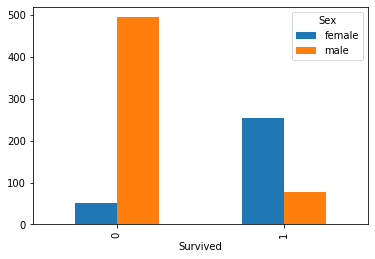

In [4]:
df_train.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot(kind='bar')

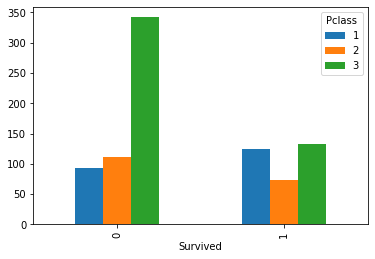

In [5]:
df_train.groupby(['Pclass', 'Survived'] )['Survived'].count().unstack('Pclass').plot(kind='bar')

<font color=red> Checking missing/categorical data </font>

In [6]:
#train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 12 columns):
PassengerId    877 non-null int64
Survived       877 non-null int64
Pclass         877 non-null int64
Name           877 non-null object
Sex            877 non-null object
Age            700 non-null float64
SibSp          877 non-null int64
Parch          877 non-null int64
Ticket         877 non-null object
Fare           876 non-null float64
Cabin          200 non-null object
Embarked       876 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.3+ KB


In [7]:
#test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
PassengerId    432 non-null int64
Pclass         432 non-null int64
Name           432 non-null object
Sex            432 non-null object
Age            346 non-null float64
SibSp          432 non-null int64
Parch          432 non-null int64
Ticket         432 non-null object
Fare           432 non-null float64
Cabin          95 non-null object
Embarked       431 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 37.2+ KB


<font color=red>
PassengerId, Ticket : Useless info.
    
Age, Cabin: a lot of missing data
    </font>

In [8]:
#drop some features
df_train_1 = df_train.drop(['PassengerId', 'Ticket', 'Age', 'Cabin'], axis=1)
df_test_1 = df_test.drop(['PassengerId', 'Ticket', 'Age', 'Cabin'], axis=1)

In [9]:
#check again
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
Survived    877 non-null int64
Pclass      877 non-null int64
Name        877 non-null object
Sex         877 non-null object
SibSp       877 non-null int64
Parch       877 non-null int64
Fare        876 non-null float64
Embarked    876 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 54.9+ KB


<font color=red> Handling **Name** </font>

In [10]:
df_train_1['Name'][:5]

0                      Beesley, Mr. Lawrence
1    Andersson, Master. Sigvard Harald Elias
2                       Drazenoic, Mr. Jozef
3     Andersson, Miss. Ida Augusta Margareta
4             Porter, Mr. Walter Chamberlain
Name: Name, dtype: object

<font color=red> Extracting title </font>

In [11]:
df_train_1['Title'] = df_train_1['Name'].str.extract('([A-Za-z]+)\.',expand=True)
df_test_1['Title'] = df_test_1['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [12]:
df_train_1['Title'][:5]

0        Mr
1    Master
2        Mr
3      Miss
4        Mr
Name: Title, dtype: object

<font color=orange> Regex tutorial:
    https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285
        </font>

<font color=red> Combining Title columns from **Train** and **Test** </font>

In [14]:
all_title = df_train_1['Title'].tolist() + df_test_1['Title'].tolist()

<font color=red> Using **Label Encoder** to convert Title </font>

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_title)

LabelEncoder()

In [16]:
df_train_1['Title_labelcoded'] = le.transform(df_train_1['Title'])

In [17]:
df_test_1['Title_labelcoded'] = le.transform(df_test_1['Title'])

In [18]:
# check first 5 rows
df_train_1[:3]

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Title,Title_labelcoded
0,1,2,"Beesley, Mr. Lawrence",male,0,0,13.0000,S,Mr,13
1,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,2,31.2750,S,Master,9
2,0,3,"Drazenoic, Mr. Jozef",male,0,0,7.8958,C,Mr,13


<font color=red> Drop **Title** and **Name** columns </font>

In [19]:
df_train_2 = df_train_1.drop(['Title', 'Name'], axis=1)
df_test_2 = df_test_1.drop(['Title', 'Name'], axis=1)

In [20]:
df_train_2[:3]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title_labelcoded
0,1,2,male,0,0,13.0000,S,13
1,0,3,male,4,2,31.2750,S,9
2,0,3,male,0,0,7.8958,C,13


<font color=red> Sex is a categorical feature </font>

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df_train_2['Sex'])

df_train_2['Sex_labelcoded'] = le.transform(df_train_2['Sex'])
df_test_2['Sex_labelcoded'] = le.transform(df_test_2['Sex'])


In [22]:
df_train_2[:3]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title_labelcoded,Sex_labelcoded
0,1,2,male,0,0,13.0000,S,13,1
1,0,3,male,4,2,31.2750,S,9,1
2,0,3,male,0,0,7.8958,C,13,1


<font color=red> Drop Sex feature </font>

In [23]:
df_train_3 = df_train_2.drop(['Sex'], axis=1)
df_test_3 = df_test_2.drop(['Sex'], axis=1)

<font color=red> Check our data again for another missing/categorical features</font>

In [24]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
Survived            877 non-null int64
Pclass              877 non-null int64
SibSp               877 non-null int64
Parch               877 non-null int64
Fare                876 non-null float64
Embarked            876 non-null object
Title_labelcoded    877 non-null int64
Sex_labelcoded      877 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 54.9+ KB


In [25]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
Pclass              432 non-null int64
SibSp               432 non-null int64
Parch               432 non-null int64
Fare                432 non-null float64
Embarked            431 non-null object
Title_labelcoded    432 non-null int64
Sex_labelcoded      432 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 23.7+ KB


<font color=red> Fare/Embarked</font>

<font color=red>Handling missing Fare data in the training </font>

In [27]:
# calculate median value of "Fare"
fare_median = df_train_3['Fare'].median()
# duplicate a data frame to avoid overwritten information
df_train_4 = df_train_3.copy() 
# fill up the NA
df_train_4["Fare"].fillna(fare_median, inplace=True)
# dummy test data frame
df_test_4 = df_test_3.copy()

In [28]:
df_train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
Survived            877 non-null int64
Pclass              877 non-null int64
SibSp               877 non-null int64
Parch               877 non-null int64
Fare                877 non-null float64
Embarked            876 non-null object
Title_labelcoded    877 non-null int64
Sex_labelcoded      877 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 54.9+ KB


<font color=red> Handling **Embarked** in both **training/testing** data</font>

<font color=red> Missing Embarked </font>

In [29]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
119,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<font color=orange> Googling for **Embarked** information</font>

https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [30]:
df_train_5 = df_train_4.copy()
df_train_5.loc[119, 'Embarked'] = 'S'

In [31]:
df_test[df_test['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


<font color=orange> Googling for **Embarked** information</font>

https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [32]:
df_test_5 = df_test_4.copy()
df_test_5.loc[160, 'Embarked'] = 'S'

<font color=red> Converting Embarked via label encoder </font>

In [33]:
le = preprocessing.LabelEncoder()
all_Embarked = df_train_5['Embarked'].tolist() + df_test_5['Embarked'].tolist()
le.fit(all_Embarked)

LabelEncoder()

In [34]:
df_train_5['Embarked_labelcoded'] = le.transform(df_train_5['Embarked'])

In [35]:
df_test_5['Embarked_labelcoded'] = le.transform(df_test_5['Embarked'])

<font color=red> Drop **Embarked** feature </font>

In [36]:
df_train_6 = df_train_5.drop(['Embarked'], axis=1)
df_test_6 = df_test_5.drop(['Embarked'], axis=1)

In [37]:
df_train_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
Survived               877 non-null int64
Pclass                 877 non-null int64
SibSp                  877 non-null int64
Parch                  877 non-null int64
Fare                   877 non-null float64
Title_labelcoded       877 non-null int64
Sex_labelcoded         877 non-null int64
Embarked_labelcoded    877 non-null int64
dtypes: float64(1), int64(7)
memory usage: 54.9 KB


In [38]:
df_test_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
Pclass                 432 non-null int64
SibSp                  432 non-null int64
Parch                  432 non-null int64
Fare                   432 non-null float64
Title_labelcoded       432 non-null int64
Sex_labelcoded         432 non-null int64
Embarked_labelcoded    432 non-null int64
dtypes: float64(1), int64(6)
memory usage: 23.7 KB


<font color=red> Correlation Matrix</font>

Text(0.5, 1, 'Feature Correlations')

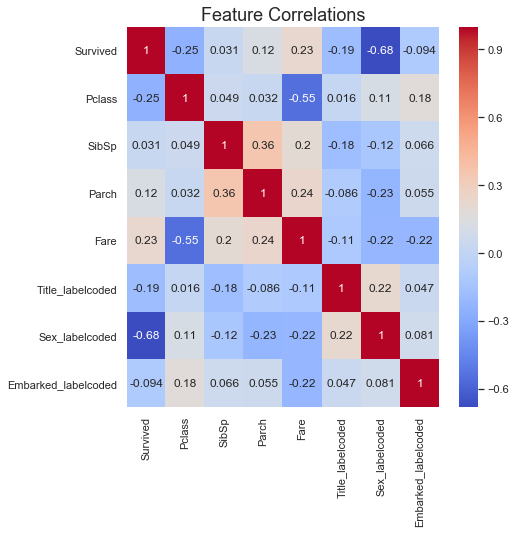

In [41]:
sns.set()
plt.figure(figsize=(7,7))
sns.heatmap(df_train_6.corr(), annot=True,  cmap='coolwarm')
plt.title("Feature Correlations", fontsize = 18)

<font color=red> Extract Features and Labels to numpy array </font>

In [42]:
X_train = df_train_6.drop(['Survived'], axis=1).values
y_train = df_train_6['Survived'].values
X_test = df_test_6.values

<font color=red> RandomForest model </font>

<font color=orange> Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</font>

<font color=orange>Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html</font>

<font color=orange> Two important hyperparameters 
1. n_estimators =# of trees
2. max_features = # of features used at split conditions
</font>

<font color=orange> Optimize these parameters using **oob_score** </font>

<font color=orange> Note that: **oob_error = 1 - oob_score** </font>

<font color=red> Optimize **n_estimators** </font>

In [43]:
my_n_estimators = [50, 100, 200, 300]
my_oob_scores = []
from sklearn.ensemble import RandomForestClassifier
for estimators in my_n_estimators:
    myRF = RandomForestClassifier(n_estimators=estimators, 
                                  max_features=None,  random_state=123, 
                                  oob_score=True,
                                 n_jobs=1)
    myRF.fit(X_train, y_train)
    my_oob_scores.append([n_estimators, myRF.oob_score_])

In [44]:
# check and select  n_estimators give the best oob_score
my_oob_scores

[[50, 0.8449258836944128],
 [100, 0.8483466362599772],
 [200, 0.8483466362599772],
 [300, 0.8483466362599772]]

<font color=red> Optimize **max_features** </font>

In [45]:
X_train.shape

(877, 7)

In [46]:
n_estimatores_best = 100
my_max_features = [1, 2, 3, 4, 5, 6, 7] #range(1, 8); 
#range(1, X_train.shape[1])
my_oob_scores = []
for max_features in my_max_features:
    myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                                  max_features=max_features,  
                                  random_state=123, oob_score=True)
    myRF.fit(X_train, y_train)
    my_oob_scores.append([max_features, myRF.oob_score_])

In [47]:
my_oob_scores

[[1, 0.8289623717217788],
 [2, 0.8380843785632839],
 [3, 0.8392246294184721],
 [4, 0.8437856328392246],
 [5, 0.8426453819840365],
 [6, 0.8483466362599772],
 [7, 0.8483466362599772]]

<font color=red> Train RandomForest with optimized parameters</font>

In [48]:
max_features_best = 7
myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                              max_features=max_features_best,  
                              random_state=123, oob_score=True)

In [49]:
#Fit training data
myRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [50]:
#Predcit test labels
y_pred = myRF.predict(X_test)

In [52]:
#y_pred

<font color=red> Feature Importance</font>

In [53]:
importances = myRF.feature_importances_

In [54]:
importances

array([0.04729363, 0.04607235, 0.02701928, 0.27204674, 0.04181618,
       0.54368897, 0.02206286])

In [55]:
# get feature names
feature_names = list(df_train_6.drop(['Survived'], axis=1))

In [56]:
feature_names

['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Title_labelcoded',
 'Sex_labelcoded',
 'Embarked_labelcoded']

In [59]:
importances

array([0.04729363, 0.04607235, 0.02701928, 0.27204674, 0.04181618,
       0.54368897, 0.02206286])

In [57]:
# sort importance values
indices = np.argsort(importances)[::-1]

In [58]:
indices

array([5, 3, 0, 1, 4, 2, 6])

In [60]:
# feature_names[5] : best one

'Sex_labelcoded'

In [61]:
# order features
ordered_feature_names = [feature_names[i] for i in indices]

In [62]:
ordered_feature_names

['Sex_labelcoded',
 'Fare',
 'Pclass',
 'SibSp',
 'Title_labelcoded',
 'Parch',
 'Embarked_labelcoded']

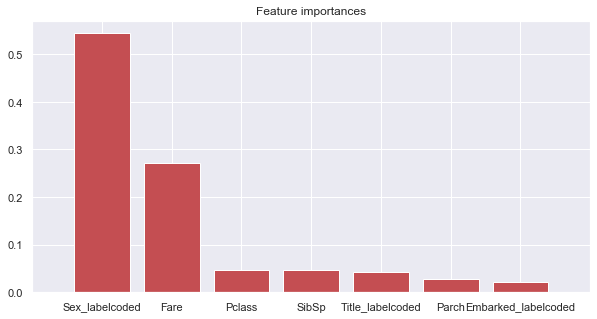

In [63]:
sns.set()
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), ordered_feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()